### Curso de Python para Finanças Quantitativas

#### Aula 5 - Mapa do IFR e RSL
#### Autor: Leandro Guerra - Outspoken Market
#### Download em: https://www.outspokenmarket.com/pythonfinancasquantitativas.html

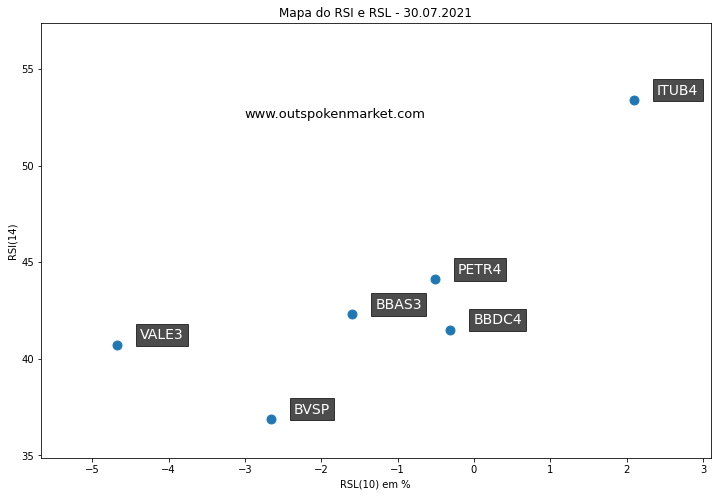

In [4]:
!pip install ta
!pip install yfinance --upgrade --no-cache-dir

In [5]:
# Carregando as bibliotecas necessarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mplfinance as fplt
from pandas_datareader import data as pdr
from datetime import date
import ta
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

___________________________________________

### Tratamento dos dados

In [6]:
# Parametros da funçao

tickers = ["^BVSP", "PETR4.SA", "ITUB4.SA", "VALE3.SA", "BBDC4.SA", "BBAS3.SA"]
inicio = "2021-01-01"
fim = "2021-07-31"

In [7]:
ibov = pdr.get_data_yahoo(tickers, start = inicio, end = fim)

[*********************100%%**********************]  6 of 6 completed


In [8]:
ibov

Adj Close                                                        \
             BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA     ^BVSP   
Date                                                                          
2021-01-04  30.979328  19.182116  27.929886  11.470778  67.380272  118558.0   
2021-01-05  30.657913  19.065166  27.749107  11.919136  68.514824  119223.0   
2021-01-06  31.358427  19.697041  28.562590  11.942943  70.761810  119851.0   
2021-01-07  32.602879  20.219975  29.674381  12.300040  75.381027  121956.0   
2021-01-08  32.792431  20.045660  29.665327  12.347654  75.145287  125077.0   
...               ...        ...        ...        ...        ...       ...   
2021-07-26  27.610443  19.827293  27.126791  11.266250  91.544022  126004.0   
2021-07-27  27.738783  19.983282  27.393188  11.135009  89.644058  124612.0   
2021-07-28  28.149477  20.451256  28.284252  11.364681  92.093597  126286.0   
2021-07-29  27.704561  20.254217  28.137270  11.405695  90.735352  125675.0   
2021-07-30  27.062857  19.909391  27.834126  11.036579  85.388748  121801.0   

                Close                                   ...       Open  \
             BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA  ...   ITUB4.SA   
Date                                                    ...              
2021-01-04  37.590000  21.842976  30.900000  28.910000  ...  31.980000   
2021-01-05  37.200001  21.694214  30.700001  30.040001  ...  30.730000   
2021-01-06  38.049999  22.413223  31.600000  30.100000  ...  30.980000   
2021-01-07  39.560001  23.008265  32.830002  31.000000  ...  31.650000   
2021-01-08  39.790001  22.809917  32.820000  31.120001  ...  32.930000   
...               ...        ...        ...        ...  ...        ...   
2021-07-26  32.270000  21.954544  29.530001  27.469999  ...  29.080000   
2021-07-27  32.419998  22.127272  29.820000  27.150000  ...  29.500000   
2021-07-28  32.900002  22.645454  30.790001  27.709999  ...  30.150000   
2021-07-29  32.380001  22.427273  30.629999  27.809999  ...  30.879999   
2021-07-30  31.629999  22.045454  30.299999  26.910000  ...  30.400000   

                                               Volume                      \
             PETR4.SA    VALE3.SA     ^BVSP  BBAS3.SA  BBDC4.SA  ITUB4.SA   
Date                                                                        
2021-01-04  28.650000   89.349998  119024.0  13874600  48196357  31347800   
2021-01-05  28.900000   91.459999  118835.0  15954000  47107478  28249800   
2021-01-06  30.160000   94.980003  119377.0  20566700  73317409  43061900   
2021-01-07  30.340000   96.610001  119103.0  21878700  56545599  46129800   
2021-01-08  31.459999  103.010002  122387.0  16240300  60861427  52532500   
...               ...         ...       ...       ...       ...       ...   
2021-07-26  26.740000  114.440002  125058.0   6037800  33585200  24167700   
2021-07-27  27.350000  115.699997  126004.0   7467500  39891170  36435400   
2021-07-28  27.430000  115.500000  124615.0   9125400  52118660  69662900   
2021-07-29  27.799999  116.370003  126285.0   7613100  35160180  23202200   
2021-07-30  27.600000  113.510002  125672.0  13410200  40227000  42493300   

                                          
            PETR4.SA  VALE3.SA     ^BVSP  
Date                                      
2021-01-04  74719700  37865500   8741400  
2021-01-05  95181100  34300300   9257100  
2021-01-06  96562500  53722500  11638200  
2021-01-07  56171300  74541400  11774800  
2021-01-08  67136300  58562700  11085800  
...              ...       ...       ...  
2021-07-26  46802600  16419900   6325500  
2021-07-27  51901800  22106500   7313800  
2021-07-28  46727100  25209200   9038200  
2021-07-29  43916600  30576800   7488400  
2021-07-30  74150400  41956700   9399200  

[143 rows x 36 columns]

In [9]:
ibov["Adj Close"][["PETR4.SA", "^BVSP", "VALE3.SA"]]

,PETR4.SA,^BVSP,VALE3.SA
Date,,,
2021-01-04,11.470778,118558.0,67.380272
2021-01-05,11.919136,119223.0,68.514824
2021-01-06,11.942943,119851.0,70.761810
2021-01-07,12.300040,121956.0,75.381027
2021-01-08,12.347654,125077.0,75.145287
...,...,...,...
2021-07-26,11.266250,126004.0,91.544022
2021-07-27,11.135009,124612.0,89.644058
2021-07-28,11.364681,126286.0,92.093597


In [10]:
df_mapa = ibov["Adj Close"][tickers]

In [11]:
tickers

['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BBDC4.SA', 'BBAS3.SA']

In [12]:
df_mapa.head()

,^BVSP,PETR4.SA,ITUB4.SA,VALE3.SA,BBDC4.SA,BBAS3.SA
Date,,,,,,
2021-01-04,118558.0,11.470778,27.929886,67.380272,19.182116,30.979328
2021-01-05,119223.0,11.919136,27.749107,68.514824,19.065166,30.657913
2021-01-06,119851.0,11.942943,28.562590,70.761810,19.697041,31.358427
2021-01-07,121956.0,12.300040,29.674381,75.381027,20.219975,32.602879
2021-01-08,125077.0,12.347654,29.665327,75.145287,20.045660,32.792431


In [13]:
df_mapa.rename(columns = {"^BVSP": "BVSP_Close", "PETR4.SA": "PETR_Close"
                          , "ITUB4.SA": "ITUB_Close", "VALE3.SA": "VALE_Close"
                          , "BBDC4.SA": "BBDC_Close", "BBAS3.SA": "BBAS_Close"}, inplace = True)
df_mapa.head()

,BVSP_Close,PETR_Close,ITUB_Close,VALE_Close,BBDC_Close,BBAS_Close
Date,,,,,,
2021-01-04,118558.0,11.470778,27.929886,67.380272,19.182116,30.979328
2021-01-05,119223.0,11.919136,27.749107,68.514824,19.065166,30.657913
2021-01-06,119851.0,11.942943,28.562590,70.761810,19.697041,31.358427
2021-01-07,121956.0,12.300040,29.674381,75.381027,20.219975,32.602879
2021-01-08,125077.0,12.347654,29.665327,75.145287,20.045660,32.792431


In [14]:
# Calculando o RSL de 10 periodos

p = 10

df_mapa["MM_bvsp"] = df_mapa["BVSP_Close"].rolling(p).mean()
df_mapa["MM_petro"] = df_mapa["PETR_Close"].rolling(p).mean()
df_mapa["MM_itub"] = df_mapa["ITUB_Close"].rolling(p).mean()
df_mapa["MM_vale"] = df_mapa["VALE_Close"].rolling(p).mean()
df_mapa["MM_bbdc"] = df_mapa["BBDC_Close"].rolling(p).mean()
df_mapa["MM_bbas"] = df_mapa["BBAS_Close"].rolling(p).mean()

df_mapa["RSL_BVSP"] = (df_mapa["BVSP_Close"]/df_mapa["MM_bvsp"] - 1)*100
df_mapa["RSL_PETR"] = (df_mapa["PETR_Close"]/df_mapa["MM_petro"] - 1)*100
df_mapa["RSL_ITUB"] = (df_mapa["ITUB_Close"]/df_mapa["MM_itub"] - 1)*100
df_mapa["RSL_VALE"] = (df_mapa["VALE_Close"]/df_mapa["MM_vale"] - 1)*100
df_mapa["RSL_BBDC"] = (df_mapa["BBDC_Close"]/df_mapa["MM_bbdc"] - 1)*100
df_mapa["RSL_BBAS"] = (df_mapa["BBAS_Close"]/df_mapa["MM_bbas"] - 1)*100



In [15]:
# Calculando o RSI (IFR) de 2 e 14 periodos


petr_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["PETR_Close"], window = 2)
petr_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["PETR_Close"], window = 14)

bvsp_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BVSP_Close"], window = 2)
bvsp_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BVSP_Close"], window = 14)

itub_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["ITUB_Close"], window = 2)
itub_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["ITUB_Close"], window = 14)

vale_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["VALE_Close"], window = 2)
vale_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["VALE_Close"], window = 14)

bbdc_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BBDC_Close"], window = 2)
bbdc_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BBDC_Close"], window = 14)

bbas_rsi2 = ta.momentum.RSIIndicator(close = df_mapa["BBAS_Close"], window = 2)
bbas_rsi14 = ta.momentum.RSIIndicator(close = df_mapa["BBAS_Close"], window = 14)


df_mapa["RSI2_PETR"] = petr_rsi2.rsi()
df_mapa["RSI14_PETR"] = petr_rsi14.rsi()

df_mapa["RSI2_BVSP"] = bvsp_rsi2.rsi()
df_mapa["RSI14_BVSP"] = bvsp_rsi14.rsi()

df_mapa["RSI2_ITUB"] = itub_rsi2.rsi()
df_mapa["RSI14_ITUB"] = itub_rsi14.rsi()

df_mapa["RSI2_VALE"] = vale_rsi2.rsi()
df_mapa["RSI14_VALE"] = vale_rsi14.rsi()

df_mapa["RSI2_BBDC"] = bbdc_rsi2.rsi()
df_mapa["RSI14_BBDC"] = bbdc_rsi14.rsi()

df_mapa["RSI2_BBAS"] = bbas_rsi2.rsi()
df_mapa["RSI14_BBAS"] = bbas_rsi14.rsi()

In [16]:
df_mapa.head()

,BVSP_Close,PETR_Close,ITUB_Close,VALE_Close,BBDC_Close,BBAS_Close,MM_bvsp,MM_petro,MM_itub,MM_vale,...,RSI2_BVSP,RSI14_BVSP,RSI2_ITUB,RSI14_ITUB,RSI2_VALE,RSI14_VALE,RSI2_BBDC,RSI14_BBDC,RSI2_BBAS,RSI14_BBAS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,118558.0,11.470778,27.929886,67.380272,19.182116,30.979328,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,119223.0,11.919136,27.749107,68.514824,19.065166,30.657913,NaN,NaN,NaN,NaN,...,100.0,NaN,0.000000,NaN,100.000000,NaN,0.000000,NaN,0.000000,NaN
2021-01-06,119851.0,11.942943,28.562590,70.761810,19.697041,31.358427,NaN,NaN,NaN,NaN,...,100.0,NaN,89.999768,NaN,100.000000,NaN,91.529709,NaN,81.339585,NaN
2021-01-07,121956.0,12.300040,29.674381,75.381027,20.219975,32.602879,NaN,NaN,NaN,NaN,...,100.0,NaN,97.109814,NaN,100.000000,NaN,96.632071,NaN,95.202940,NaN
2021-01-08,125077.0,12.347654,29.665327,75.145287,20.045660,32.792431,NaN,NaN,NaN,NaN,...,100.0,NaN,95.998131,NaN,92.744018,NaN,68.944301,NaN,96.088256,NaN


In [17]:
# Filtrando os valores missing

df_mapa = df_mapa.dropna(axis = 0) 

In [18]:
df_mapa.head()

,BVSP_Close,PETR_Close,ITUB_Close,VALE_Close,BBDC_Close,BBAS_Close,MM_bvsp,MM_petro,MM_itub,MM_vale,...,RSI2_BVSP,RSI14_BVSP,RSI2_ITUB,RSI14_ITUB,RSI2_VALE,RSI14_VALE,RSI2_BBDC,RSI14_BBDC,RSI2_BBAS,RSI14_BBAS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-21,118443.0,10.931162,27.035038,68.780029,18.505928,28.169018,121797.1,11.579892,28.466787,71.077860,...,6.845717,42.502148,3.543152,35.460626,48.481872,46.895556,4.486839,34.875178,0.487215,23.692020
2021-01-22,117172.0,10.748647,26.456562,68.640060,18.164566,27.765192,121006.6,11.419991,28.145910,70.427338,...,3.230023,38.404617,1.460312,30.987256,41.993752,46.319131,2.126617,30.884949,0.252853,21.785003
2021-01-26,116464.0,10.712937,25.578438,67.593918,17.728786,27.023466,120372.3,11.266836,27.804108,69.673674,...,2.033476,36.304954,0.524404,25.689425,13.995792,42.149064,0.907625,26.687163,0.091380,18.792877
2021-01-27,115882.0,10.871649,25.578438,65.715271,17.982992,27.814638,119560.7,11.138678,27.453267,68.937691,...,1.263785,34.628931,0.524404,25.689425,4.123004,35.898761,40.618585,32.454470,57.707943,29.859239
2021-01-28,119314.0,11.014488,26.610624,67.115044,18.542234,28.465700,119288.1,11.083526,27.253550,68.560490,...,81.929947,49.449063,75.213825,39.735320,53.258057,42.715088,78.510329,43.065714,78.302088,37.417157


In [19]:
df_mapa["RSL_PETR"].tail(1)[0]

-0.510194344275694

___________________________________________

### Criando o mapa

In [20]:
# Preparando o dataframe

# Agrupando os dados
indicadores = [
                  ["PETR4", df_mapa["RSL_PETR"].tail(1)[0], df_mapa["RSI14_PETR"].tail(1)[0]]
                , ["BVSP", df_mapa["RSL_BVSP"].tail(1)[0], df_mapa["RSI14_BVSP"].tail(1)[0]]
                , ["ITUB4", df_mapa["RSL_ITUB"].tail(1)[0], df_mapa["RSI14_ITUB"].tail(1)[0]]
                , ["VALE3", df_mapa["RSL_VALE"].tail(1)[0], df_mapa["RSI14_VALE"].tail(1)[0]]
                , ["BBDC4", df_mapa["RSL_BBDC"].tail(1)[0], df_mapa["RSI14_BBDC"].tail(1)[0]]
                , ["BBAS3", df_mapa["RSL_BBAS"].tail(1)[0], df_mapa["RSI14_BBAS"].tail(1)[0]]
              ]
 
# Criar o DataFrame do pandas
mapa = pd.DataFrame(indicadores, columns = ["Ativo", "RSL", "RSI14"])

mapa.head(6)

,Ativo,RSL,RSI14
0,PETR4,-0.510194,44.120316
1,BVSP,-2.660667,36.899421
2,ITUB4,2.099267,53.393483
3,VALE3,-4.670915,40.759593
4,BBDC4,-0.308322,41.516920
5,BBAS3,-1.592929,42.305314


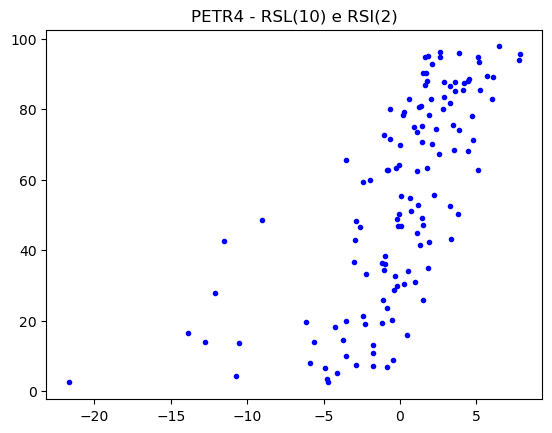

In [21]:
# Algumas considerações interessantes

plt.plot(df_mapa["RSL_PETR"], df_mapa["RSI2_PETR"], ".", color = "blue")
plt.title("PETR4 - RSL(10) e RSI(2)");

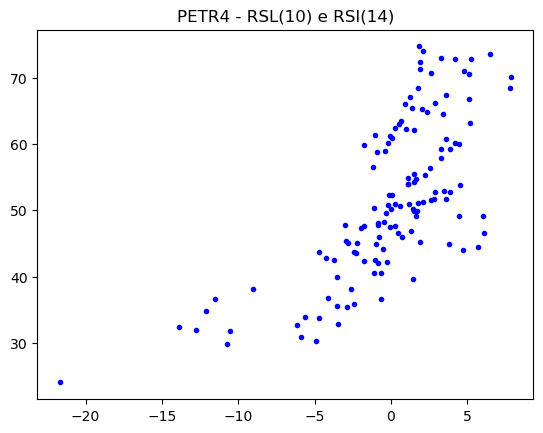

In [22]:
plt.plot(df_mapa["RSL_PETR"], df_mapa["RSI14_PETR"], ".", color = "blue")
plt.title("PETR4 - RSL(10) e RSI(14)");

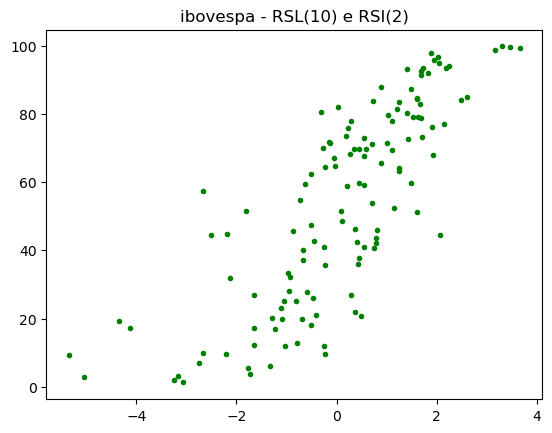

In [23]:
plt.plot(df_mapa["RSL_BVSP"], df_mapa["RSI2_BVSP"], ".", color = "green")
plt.title("ibovespa - RSL(10) e RSI(2)");

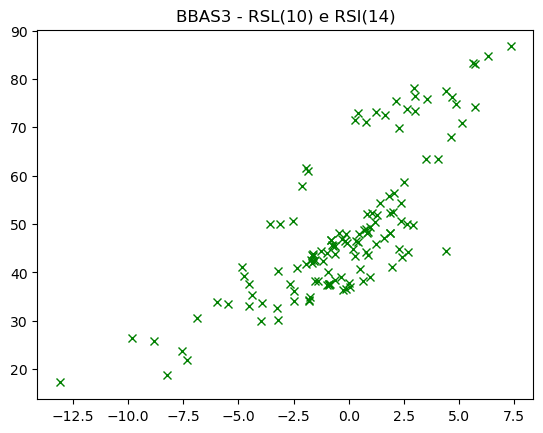

In [24]:
plt.plot(df_mapa["RSL_BBAS"], df_mapa["RSI14_BBAS"], "x", color = "green")
plt.title("BBAS3 - RSL(10) e RSI(14)");

In [25]:
mapa

,Ativo,RSL,RSI14
0,PETR4,-0.510194,44.120316
1,BVSP,-2.660667,36.899421
2,ITUB4,2.099267,53.393483
3,VALE3,-4.670915,40.759593
4,BBDC4,-0.308322,41.516920
5,BBAS3,-1.592929,42.305314


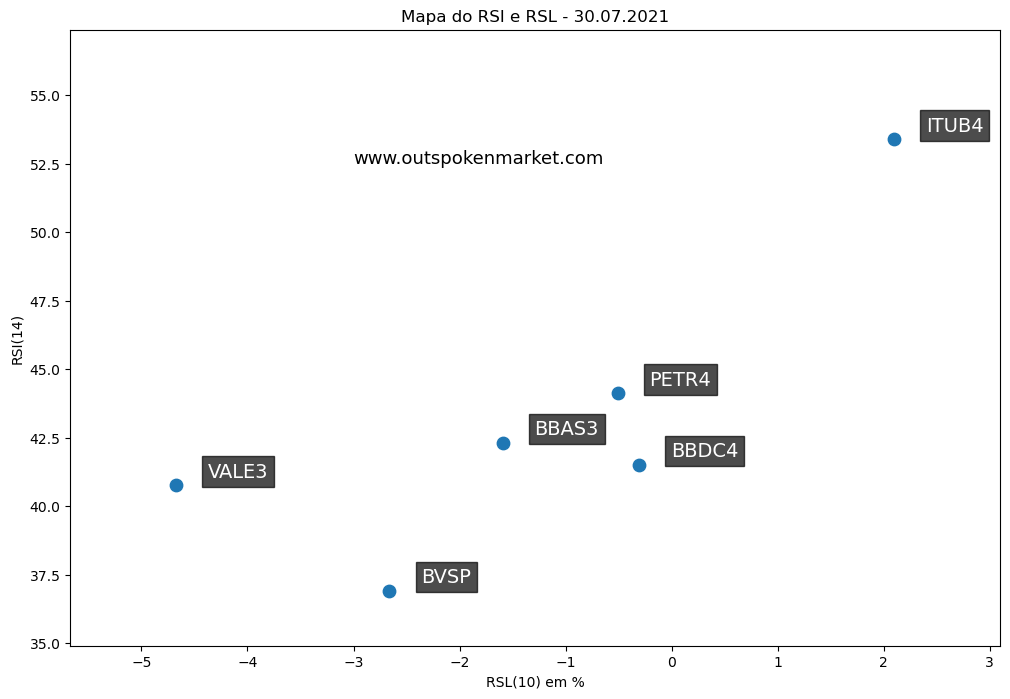

In [26]:
plt.figure(figsize = (12, 8))

plt.scatter(mapa["RSL"], mapa["RSI14"], s = 80)
for i in range(mapa.shape[0]):
    plt.text(x = mapa.RSL[i] + 0.3, y = mapa.RSI14[i] + 0.3 , s = mapa.Ativo[i], 
             fontdict = dict(color = "white", size = 14),
             bbox = dict(facecolor = "black", alpha = 0.7))

plt.xlim(mapa.RSL.min() - 1, mapa.RSL.max() + 1)               
plt.ylim(mapa.RSI14.min() - 2, mapa.RSI14.max() + 4)          

setup = dict(size = 13, color = "black")
plt.text(-3, 52.5, "www.outspokenmarket.com", **setup)

plt.title("Mapa do RSI e RSL - 30.07.2021") 
plt.xlabel("RSL(10) em %")                        
plt.ylabel("RSI(14)")                     
plt.show()